# Locate regions where there are the most incidences of crimes. 

#### Register the biggests occurrences of serious crimes and their locations.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
!pip install -U plotly
import plotly.express as px
!pip install folium
import folium
import pandas as pd
from folium import plugins

In [5]:
df = pd.read_csv("LocalCrimeOneYearofData2012.csv", sep = ",")
df

,Agency,State,Months,Population,Violent_crime_total,Murder_and_Manslaughter,Forcible_rape,Robbery,Aggravated_assault,Property_crime_total,Burglary,Larceny_theft,Motor_vehicle_theft,lat,long
0,Abilene Police Dept,TX,12,119886,472,3,38,127,304,4393,1037,3185,171,32.4887,99.7331
1,Akron City Police Dept,OH,12,198390,1759,24,167,577,991,10034,3429,5884,721,41.0814,81.5190
2,Alexandria Police Dept,VA,12,145892,243,0,9,138,96,2990,281,2383,326,38.8048,77.0469
3,Allentown City Police Dept,PA,12,119334,653,15,54,374,210,4603,1248,2987,368,40.6084,75.4902
4,Amarillo Police Dept,TX,12,196576,1278,10,110,278,880,8900,2087,6184,629,35.2220,101.8313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,Wilmington Police Dept,NC,12,109370,618,8,23,261,326,5910,1694,3843,373,34.2250,77.9447
209,Winston-Salem Police Dept,NC,12,234687,1556,6,74,428,1048,13701,4529,8490,682,30.0999,80.2442
210,Woodbridge Police Dept,NJ,12,100612,122,0,3,55,64,1967,338,1514,115,38.6582,77.2497
211,Worcester Police Dept,MA,12,183247,1758,8,33,419,1298,6432,2040,3927,465,42.2626,71.8023


In [6]:
df.isnull().values.any()

False

In [7]:
print(df['Agency'].unique()) #lista os valores únicos 

df['Agency'].nunique() #retorna a quantidade de valores 

['Abilene Police Dept' 'Akron City Police Dept' 'Alexandria Police Dept'
 'Allentown City Police Dept' 'Amarillo Police Dept'
 'Amherst Town Police Dept' 'Ann Arbor Police Dept' 'Antioch Police Dept'
 'Arvada Police Dept' 'Athens-Clarke County Police Department'
 'Aurora Police Dept' 'Baton Rouge Police Dept' 'Beaumont Police Dept'
 'Bellevue Police Dept' 'Berkeley Police Dept' 'Billings Police Dept'
 'Birmingham Police Dept' 'Boise Police Dept' 'Boulder Police Dept'
 'Bridgeport Police Dept' 'Broken Arrow Police Dept'
 'Brownsville Police Dept' 'Burbank Police Dept' 'Cambridge Police Dept'
 'Cape Coral Police Dept' 'Carslbad Police Dept' 'Carrollton Police Dept'
 'Cary Police Dept' 'Cedar Rapids Police Dept' 'Centennial'
 'Chandler Police Dept' 'Charleston City Police Dept'
 'Chattanooga Police Dept' 'Chesapeake Police Dept'
 'Chula Vista Police Dept' 'Clarksville Police Dept'
 'Clearwater Police Dept' 'Columbia Police Dept' 'Columbus Police Dept'
 'Concord Police Dept' 'Coral Springs

206

In [8]:
print(df['State'].unique()) #lista os valores únicos 

df['State'].nunique() #retorna a quantidade de valores 

['TX' 'OH' 'VA' 'PA' 'NY' 'MI' 'CA' 'CO' 'GA' 'IL' 'LA' 'WA' 'MT' 'AL'
 'ID' 'CT' 'OK' 'MA' 'FL' 'NC' 'IA' 'AZ' 'SC' 'TN' 'MO' 'NJ' 'OR' 'IN'
 'ND' 'WI' 'MS' 'KS' 'AR' 'NH' 'NV' 'RI' 'UT' 'MN' 'SD']


39

In [9]:
print(df.shape)
df.info()

(213, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Agency                   213 non-null    object 
 1   State                    213 non-null    object 
 2   Months                   213 non-null    int64  
 3   Population               213 non-null    int64  
 4   Violent_crime_total      213 non-null    int64  
 5   Murder_and_Manslaughter  213 non-null    int64  
 6   Forcible_rape            213 non-null    int64  
 7   Robbery                  213 non-null    int64  
 8   Aggravated_assault       213 non-null    int64  
 9   Property_crime_total     213 non-null    int64  
 10  Burglary                 213 non-null    int64  
 11  Larceny_theft            213 non-null    int64  
 12  Motor_vehicle_theft      213 non-null    int64  
 13  lat                      213 non-null    float64
 14  long            

In [10]:

# proporção dos crimes violentos
df['P_viole'] = round(df['Violent_crime_total'] / df['Population'], 4)
df['P_assainato'] = round(df['Murder_and_Manslaughter'] / df['Violent_crime_total'], 4)
df['P_estupro'] = round (df['Forcible_rape'] / df['Violent_crime_total'], 4)
df['P_roubo'] = round(df['Robbery'] / df['Violent_crime_total'], 4)
df['P_agrecao'] = round(df['Aggravated_assault'] / df['Violent_crime_total'], 4)
# proporção dos crimes de propriedade
df['P_prop'] = round(df['Property_crime_total'] / df['Population'], 4)
df['P_invasao'] = round(df['Burglary'] / df['Property_crime_total'],4)
df['P_furto'] = round(df['Larceny_theft'] / df['Property_crime_total'], 4)
df['P_veiculo'] = round(df['Motor_vehicle_theft'] / df['Property_crime_total'], 4)

In [11]:
df.columns

Index(['Agency', 'State', 'Months', 'Population', 'Violent_crime_total',
       'Murder_and_Manslaughter', 'Forcible_rape', 'Robbery',
       'Aggravated_assault', 'Property_crime_total', 'Burglary',
       'Larceny_theft', 'Motor_vehicle_theft', 'lat', 'long', 'P_viole',
       'P_assainato', 'P_estupro', 'P_roubo', 'P_agrecao', 'P_prop',
       'P_invasao', 'P_furto', 'P_veiculo'],
      dtype='object')

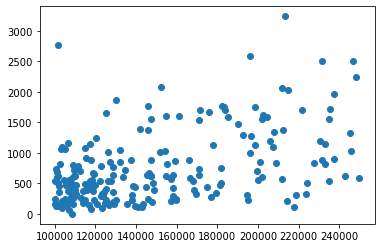

In [12]:
plt.scatter(df['Population'], df['Violent_crime_total'], label = 'df')
plt.show()

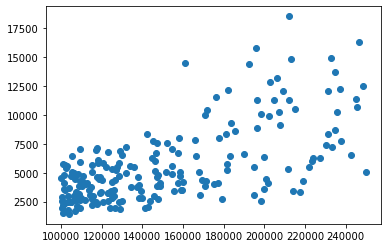

In [13]:
plt.scatter(df['Population'], df['Property_crime_total'], label = 'df')
plt.show()

In [14]:
 # df.plot(kind = 'bar',subplots = True, layout = (5,5), figsize = (20, 20))

In [15]:
df

,Agency,State,Months,Population,Violent_crime_total,Murder_and_Manslaughter,Forcible_rape,Robbery,Aggravated_assault,Property_crime_total,...,long,P_viole,P_assainato,P_estupro,P_roubo,P_agrecao,P_prop,P_invasao,P_furto,P_veiculo
0,Abilene Police Dept,TX,12,119886,472,3,38,127,304,4393,...,99.7331,0.0039,0.0064,0.0805,0.2691,0.6441,0.0366,0.2361,0.7250,0.0389
1,Akron City Police Dept,OH,12,198390,1759,24,167,577,991,10034,...,81.5190,0.0089,0.0136,0.0949,0.3280,0.5634,0.0506,0.3417,0.5864,0.0719
2,Alexandria Police Dept,VA,12,145892,243,0,9,138,96,2990,...,77.0469,0.0017,0.0000,0.0370,0.5679,0.3951,0.0205,0.0940,0.7970,0.1090
3,Allentown City Police Dept,PA,12,119334,653,15,54,374,210,4603,...,75.4902,0.0055,0.0230,0.0827,0.5727,0.3216,0.0386,0.2711,0.6489,0.0799
4,Amarillo Police Dept,TX,12,196576,1278,10,110,278,880,8900,...,101.8313,0.0065,0.0078,0.0861,0.2175,0.6886,0.0453,0.2345,0.6948,0.0707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,Wilmington Police Dept,NC,12,109370,618,8,23,261,326,5910,...,77.9447,0.0057,0.0129,0.0372,0.4223,0.5275,0.0540,0.2866,0.6503,0.0631
209,Winston-Salem Police Dept,NC,12,234687,1556,6,74,428,1048,13701,...,80.2442,0.0066,0.0039,0.0476,0.2751,0.6735,0.0584,0.3306,0.6197,0.0498
210,Woodbridge Police Dept,NJ,12,100612,122,0,3,55,64,1967,...,77.2497,0.0012,0.0000,0.0246,0.4508,0.5246,0.0196,0.1718,0.7697,0.0585
211,Worcester Police Dept,MA,12,183247,1758,8,33,419,1298,6432,...,71.8023,0.0096,0.0046,0.0188,0.2383,0.7383,0.0351,0.3172,0.6105,0.0723


In [16]:
df.groupby(by=['State','Agency']).agg({'Violent_crime_total': ['sum','min','max'], 'Murder_and_Manslaughter': ['sum','min','max'], 'Forcible_rape': ['sum','min','max'], 'Aggravated_assault' : ['sum','min','max']})

Violent_crime_total              \
                                               sum   min   max   
State Agency                                                     
AL    Birmingham Police Dept                  3237  3237  3237   
      Huntsville Police Dept                  1696  1696  1696   
      Montgomery Police Dept                   827   827   827   
AR    Little Rock Police Dept                 2579  2579  2579   
AZ    Chandler Police Dept                     628   628   628   
...                                            ...   ...   ...   
WA    Spokane Police Dept                     1369  1369  1369   
      Tacoma Police Dept                      1615  1615  1615   
      Vancouver Police Dept                    592   592   592   
WI    Green Bay Police Dept                    514   514   514   
      Madison City Police Dept                 897   897   897   

                               Murder_and_Manslaughter         Forcible_rape  \
                                                   sum min max           sum   
State Agency                                                                   
AL    Birmingham Police Dept                        67  67  67           152   
      Huntsville Police Dept                        14  14  14            72   
      Montgomery Police Dept                        44  44  44            41   
AR    Little Rock Police Dept                       45  45  45           137   
AZ    Chandler Police Dept                           4   4   4            64   
...                                                ...  ..  ..           ...   
WA    Spokane Police Dept                           13  13  13            81   
      Tacoma Police Dept                            12  12  12            93   
      Vancouver Police Dept                          5   5   5            72   
WI    Green Bay Police Dept                          1   1   1            44   
      Madison City Police Dept                       3   3   3           114   

                                         Aggravated_assault              
                                min  max                sum   min   max  
State Agency                                                             
AL    Birmingham Police Dept    152  152               2035  2035  2035  
      Huntsville Police Dept     72   72               1154  1154  1154  
      Montgomery Police Dept     41   41                283   283   283  
AR    Little Rock Police Dept   137  137               1590  1590  1590  
AZ    Chandler Police Dept       64   64                411   411   411  
...                             ...  ...                ...   ...   ...  
WA    Spokane Police Dept        81   81                738   738   738  
      Tacoma Police Dept         93   93               1024  1024  1024  
      Vancouver Police Dept      72   72                343   343   343  
WI    Green Bay Police Dept      44   44                382   382   382  
      Madison City Police Dept  114  114                539   539   539  

[213 rows x 12 columns]

In [17]:
df.groupby(by= 'Agency').sum()

,Months,Population,Violent_crime_total,Murder_and_Manslaughter,Forcible_rape,Robbery,Aggravated_assault,Property_crime_total,Burglary,Larceny_theft,...,long,P_viole,P_assainato,P_estupro,P_roubo,P_agrecao,P_prop,P_invasao,P_furto,P_veiculo
Agency,,,,,,,,,,,,,,,,,,,,,
Abilene Police Dept,12,119886,472,3,38,127,304,4393,1037,3185,...,99.7331,0.0039,0.0064,0.0805,0.2691,0.6441,0.0366,0.2361,0.7250,0.0389
Akron City Police Dept,12,198390,1759,24,167,577,991,10034,3429,5884,...,81.5190,0.0089,0.0136,0.0949,0.3280,0.5634,0.0506,0.3417,0.5864,0.0719
Alexandria Police Dept,12,145892,243,0,9,138,96,2990,281,2383,...,77.0469,0.0017,0.0000,0.0370,0.5679,0.3951,0.0205,0.0940,0.7970,0.1090
Allentown City Police Dept,12,119334,653,15,54,374,210,4603,1248,2987,...,75.4902,0.0055,0.0230,0.0827,0.5727,0.3216,0.0386,0.2711,0.6489,0.0799
Amarillo Police Dept,12,196576,1278,10,110,278,880,8900,2087,6184,...,101.8313,0.0065,0.0078,0.0861,0.2175,0.6886,0.0453,0.2345,0.6948,0.0707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wilmington Police Dept,12,109370,618,8,23,261,326,5910,1694,3843,...,77.9447,0.0057,0.0129,0.0372,0.4223,0.5275,0.0540,0.2866,0.6503,0.0631
Winston-Salem Police Dept,12,234687,1556,6,74,428,1048,13701,4529,8490,...,80.2442,0.0066,0.0039,0.0476,0.2751,0.6735,0.0584,0.3306,0.6197,0.0498
Woodbridge Police Dept,12,100612,122,0,3,55,64,1967,338,1514,...,77.2497,0.0012,0.0000,0.0246,0.4508,0.5246,0.0196,0.1718,0.7697,0.0585


In [18]:
# df.drop('Months', axis = 1, inplace = True)

In [19]:
PropertyCrime = df.iloc[:, [0,1,20,21,22,23]].sort_values(by = 'P_prop')

In [20]:
ViolenteCrime = df.iloc[:, [0,1,16,17,18,19]]


In [21]:
df['Agency'].value_counts().head(6)

Springfield Police Dept    3
Rochester Police Dept      2
Glendale Police Dept       2
Pasadena Police Dept       2
Columbia Police Dept       2
Peoria Police Dept         2
Name: Agency, dtype: int64

In [22]:
df1 = df.groupby('State')

In [23]:
df.corr()

,Months,Population,Violent_crime_total,Murder_and_Manslaughter,Forcible_rape,Robbery,Aggravated_assault,Property_crime_total,Burglary,Larceny_theft,...,long,P_viole,P_assainato,P_estupro,P_roubo,P_agrecao,P_prop,P_invasao,P_furto,P_veiculo
Months,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Population,NaN,1.000000,0.478103,0.357564,0.295768,0.431243,0.463801,0.650680,0.565201,0.646669,...,0.152446,0.111043,0.161252,-0.216967,0.009681,0.079861,0.203331,0.077403,-0.029252,-0.036941
Violent_crime_total,NaN,0.478103,1.000000,0.777514,0.625429,0.902059,0.969865,0.760441,0.837885,0.663472,...,0.068596,0.889385,0.217831,-0.354737,0.017216,0.132519,0.673158,0.518332,-0.419738,0.108041
Murder_and_Manslaughter,NaN,0.357564,0.777514,1.000000,0.433126,0.831062,0.677078,0.610133,0.736340,0.500686,...,0.150953,0.698441,0.633497,-0.306158,0.222087,-0.133501,0.548420,0.478689,-0.389721,0.103049
Forcible_rape,NaN,0.295768,0.625429,0.433126,1.000000,0.489390,0.583958,0.526395,0.530903,0.492197,...,0.046672,0.555986,0.036895,0.275991,-0.183335,0.056852,0.487740,0.263118,-0.157301,-0.033941
Robbery,NaN,0.431243,0.902059,0.831062,0.489390,1.000000,0.776811,0.705313,0.817476,0.581441,...,0.082656,0.798854,0.359478,-0.408874,0.363172,-0.210186,0.636233,0.539181,-0.510588,0.229918
Aggravated_assault,NaN,0.463801,0.969865,0.677078,0.583958,0.776811,1.000000,0.721111,0.775800,0.645365,...,0.051753,0.863730,0.117848,-0.346844,-0.160474,0.319966,0.629306,0.467496,-0.342626,0.040345
Property_crime_total,NaN,0.650680,0.760441,0.610133,0.526395,0.705313,0.721111,1.000000,0.901069,0.972544,...,0.122749,0.523578,0.241729,-0.262607,0.074503,0.028233,0.850268,0.231768,-0.141890,-0.024460
Burglary,NaN,0.565201,0.837885,0.736340,0.530903,0.817476,0.775800,0.901069,1.000000,0.796418,...,0.072244,0.656855,0.310869,-0.312387,0.151572,-0.033244,0.781549,0.582086,-0.405025,0.015845
Larceny_theft,NaN,0.646669,0.663472,0.500686,0.492197,0.581441,0.645365,0.972544,0.796418,1.000000,...,0.143227,0.412652,0.185106,-0.195925,-0.005802,0.084145,0.814824,0.053316,0.070111,-0.168917


# Was descovered the given locations were wrong. The places in dataset are in several countries at Asia

In [24]:
latitude = df['lat'].tolist()
longitude = df['long'].tolist()

In [25]:
coordenadas = []
for lat, long in zip (df.lat.values[:213], df.long.values[:213]):
    coordenadas.append([lat,long])

In [26]:
mapa = folium.Map(location=[40.6643, -73.9385], zoom_start=5, tiles='Stamen Toner')

In [27]:
# mapa.add_child(plugins.HeatMap(coordenadas))
# mapa

In [28]:
df_int = df.select_dtypes(include = 'int').drop(['Months'], axis = 1)

In [29]:
colunas = list(df_int.columns)

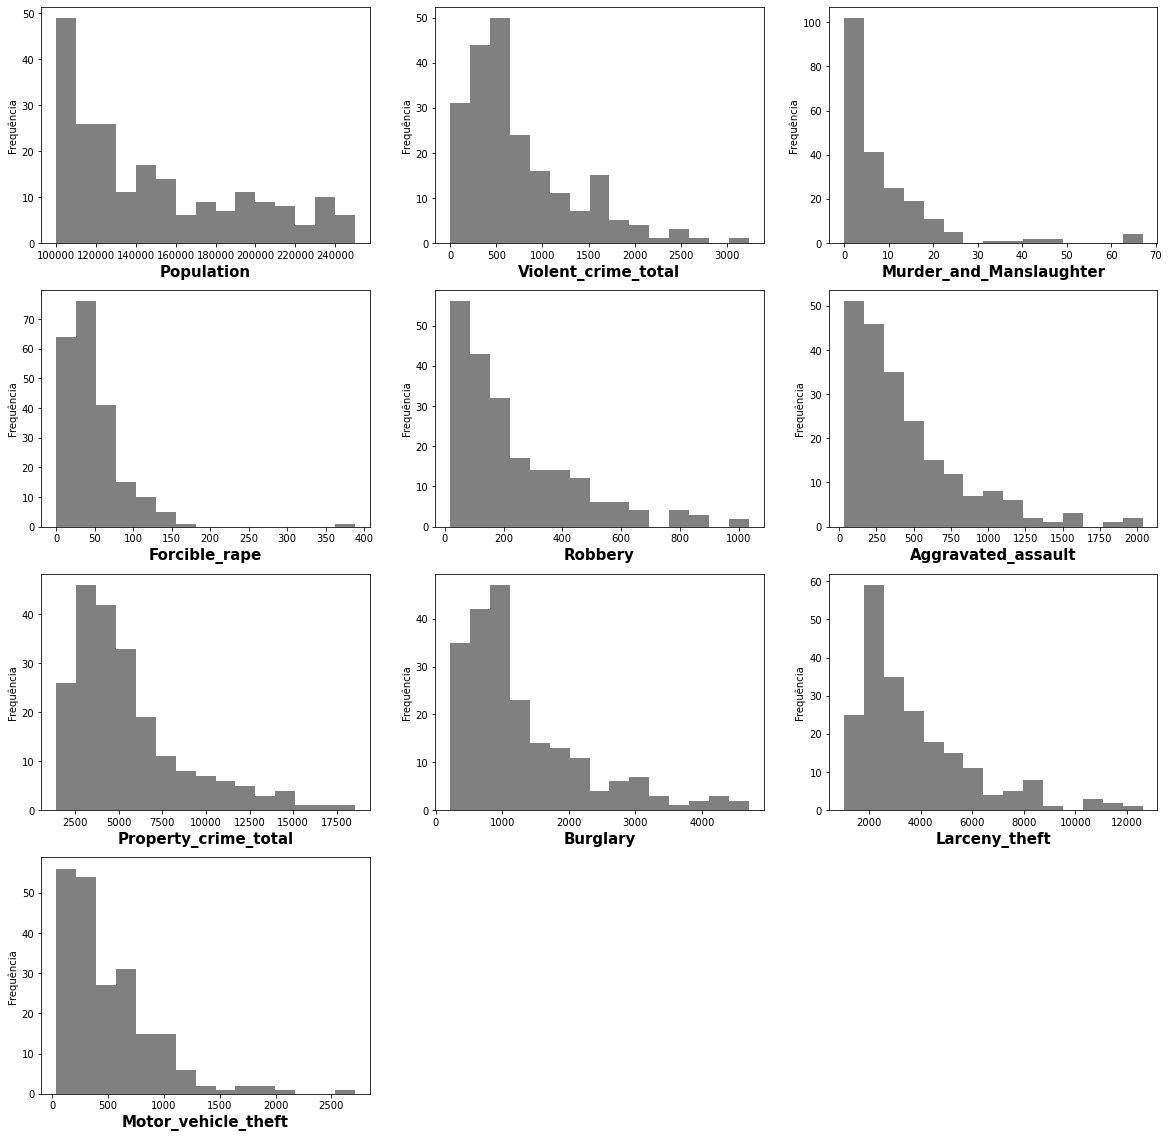

In [30]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,20))

counter = 0 

for i in range(4):
  for j in range(3):

    ax = axes[i][j]

    # Plotar somente quando houver dados
    if counter < len(colunas):

      ax.hist(df_int[colunas[counter]], bins=15, color = 'grey')
      ax.set_xlabel(colunas[counter], fontsize = 15, fontweight = 'bold')
      ax.set_ylabel('Frequência')

    else:
      ax.set_axis_off()

    counter += 1

plt.show()